In [28]:
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Daksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip3 install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 1.2 MB/s eta 0:00:13
   -- ------------------------------------- 0.8/14.8 MB 1.2 MB/s eta 0:00:12
   -- ------------------------------------- 1.0/14.8 MB 1.3 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/14.8 MB 1.3 MB/s eta 0:00:11
   ---- ----------------------------------- 1.8/14.8 MB 1.5 MB/s eta 0:00:09
   ----- ---------------------------------- 2.1/14.8 MB 1.5 MB/s eta 0:00:09
   ------- -------------------------------- 2.6/14.8 MB 1.6 MB/s eta 0:00:08
   -------- ------------------------------- 3.1/14.8 MB 1.7 MB/s eta 0:00:07
   --------- ------------------------------ 3.4/14.8 MB 1.7 MB/s eta 0:00:07
   ---------- -----


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Daksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.tools as tls
import plotly.offline as py      
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('loan.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [5]:
#Check percentage of null data
null_percentages = df.isnull().mean() * 100

for column, percentage in null_percentages.items():

  if percentage:
    print({column: [round(percentage, 5), df[column].dtype]})

{'emp_title': [5.79933, dtype('O')]}
{'emp_length': [5.05139, dtype('O')]}
{'annual_inc': [0.00045, dtype('float64')]}
{'desc': [85.79795, dtype('O')]}
{'title': [0.01724, dtype('O')]}
{'delinq_2yrs': [0.00327, dtype('float64')]}
{'earliest_cr_line': [0.00327, dtype('O')]}
{'inq_last_6mths': [0.00327, dtype('float64')]}
{'mths_since_last_delinq': [51.19706, dtype('float64')]}
{'mths_since_last_record': [84.5553, dtype('float64')]}
{'open_acc': [0.00327, dtype('float64')]}
{'pub_rec': [0.00327, dtype('float64')]}
{'revol_util': [0.05657, dtype('float64')]}
{'total_acc': [0.00327, dtype('float64')]}
{'last_pymnt_d': [1.99002, dtype('O')]}
{'next_pymnt_d': [28.50766, dtype('O')]}
{'last_credit_pull_d': [0.00597, dtype('O')]}
{'collections_12_mths_ex_med': [0.01634, dtype('float64')]}
{'mths_since_last_major_derog': [75.01597, dtype('float64')]}
{'annual_inc_joint': [99.94241, dtype('float64')]}
{'dti_joint': [99.94264, dtype('float64')]}
{'verification_status_joint': [99.94241, dtype('O')

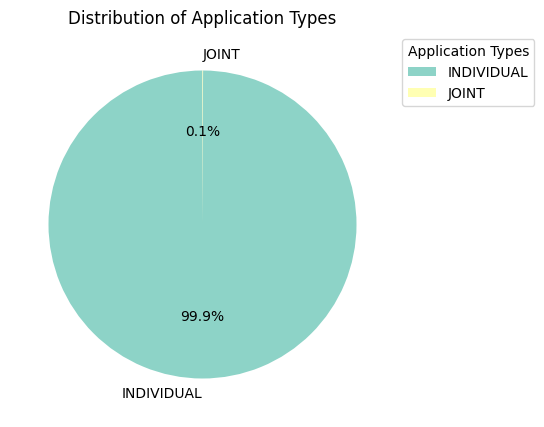

In [6]:
# Get the value counts for 'application_type'
application_type_counts = df['application_type'].value_counts()

# Set up the figure
plt.figure(figsize=(8, 5))

# Create the pie chart
plt.pie(application_type_counts.values, labels=application_type_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('Set3'))

# Add a legend
plt.legend(application_type_counts.index, title="Application Types", bbox_to_anchor=(1, 1), loc="best")

# Set title
plt.title('Distribution of Application Types')

# Display the plot
plt.show()


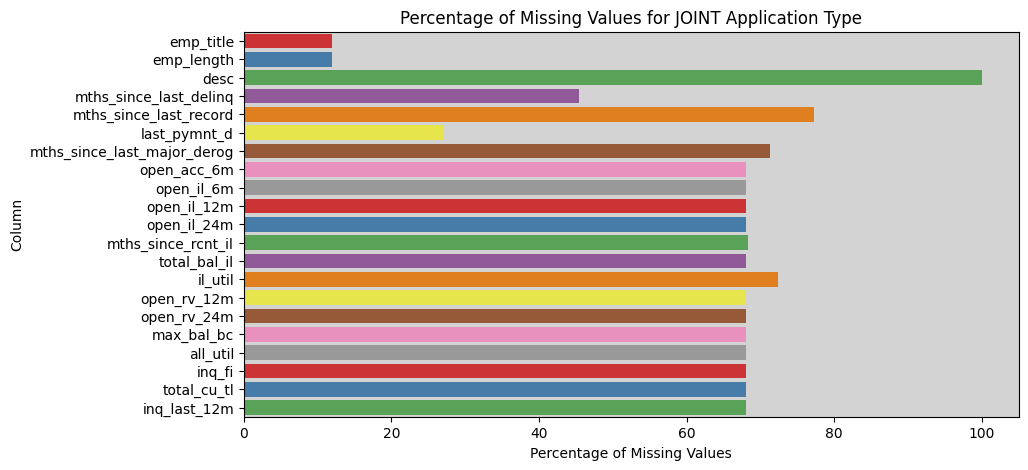

In [8]:
# Get the percentage of missing values for the 'JOINT' application type
joint_na_percentages = df[df['application_type'] == 'JOINT'].isna().mean() * 100

# Filter columns with more than 5% missing values
joint_na_percentages = joint_na_percentages[joint_na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 5))

# Create the bar plot using Seaborn
sns.barplot(x=joint_na_percentages.values, y=joint_na_percentages.index, palette='Set1')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for JOINT Application Type')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()


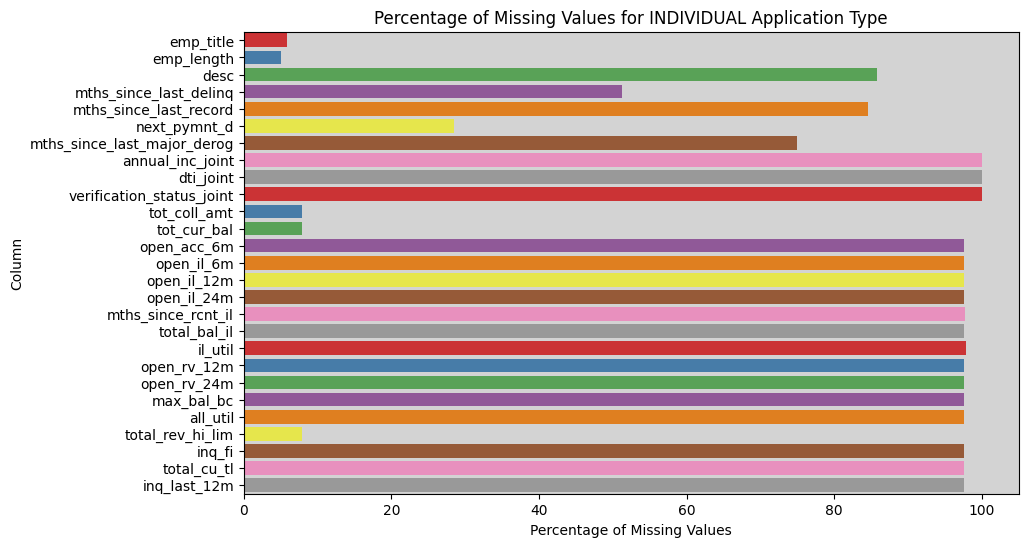

In [9]:
# Get the percentage of missing values for the 'INDIVIDUAL' application type
individual_na_percentages = df[df['application_type'] == 'INDIVIDUAL'].isna().mean() * 100

# Filter columns with more than 5% missing values
individual_na_percentages = individual_na_percentages[individual_na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=individual_na_percentages.values, y=individual_na_percentages.index, palette='Set1')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for INDIVIDUAL Application Type')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()


In [12]:
#drop JOINT records to keep all values for INDIVIDUAL application_type
df = df[df['application_type'] != 'JOINT']

columns_to_drop = [i for i in df.columns if 'joint' in i]
columns_to_drop.append('application_type')

In [13]:
df.drop(columns=columns_to_drop, inplace=True)

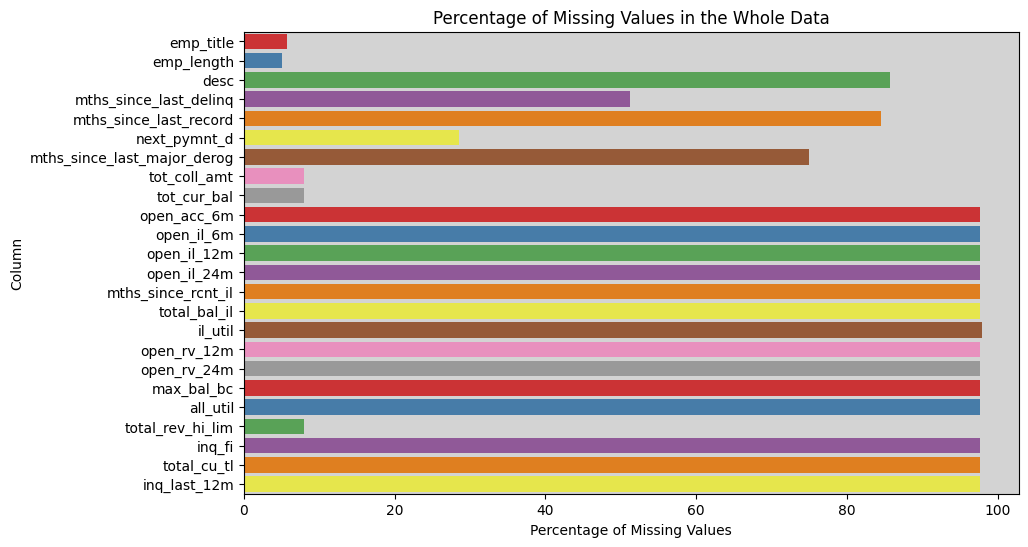

In [15]:
# Get the percentage of missing values for the entire DataFrame
na_percentages = df.isna().mean() * 100

# Filter columns with more than 5% missing values
na_percentages = na_percentages[na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=na_percentages.values, y=na_percentages.index, palette='Set1')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values in the Whole Data')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()


In [16]:
columns_to_drop = []

for i in df.columns:

  if df[i].isna().mean()*100 > 20:

    columns_to_drop.append(i)

df.drop(columns=columns_to_drop, inplace=True)

for i in df.columns:

  print({i: df[i].nunique()})


{'id': 886868}
{'member_id': 886868}
{'loan_amnt': 1372}
{'funded_amnt': 1372}
{'funded_amnt_inv': 9856}
{'term': 2}
{'int_rate': 542}
{'installment': 68701}
{'grade': 7}
{'sub_grade': 35}
{'emp_title': 299159}
{'emp_length': 11}
{'home_ownership': 6}
{'annual_inc': 49345}
{'verification_status': 3}
{'issue_d': 103}
{'loan_status': 10}
{'pymnt_plan': 2}
{'url': 886868}
{'purpose': 14}
{'title': 63143}
{'zip_code': 935}
{'addr_state': 51}
{'dti': 4000}
{'delinq_2yrs': 29}
{'earliest_cr_line': 696}
{'inq_last_6mths': 28}
{'open_acc': 77}
{'pub_rec': 32}
{'revol_bal': 73738}
{'revol_util': 1356}
{'total_acc': 135}
{'initial_list_status': 2}
{'out_prncp': 248246}
{'out_prncp_inv': 266137}
{'total_pymnt': 506637}
{'total_pymnt_inv': 506515}
{'total_rec_prncp': 260185}
{'total_rec_int': 324623}
{'total_rec_late_fee': 6181}
{'recoveries': 23055}
{'collection_recovery_fee': 20708}
{'last_pymnt_d': 98}
{'last_pymnt_amnt': 232437}
{'last_credit_pull_d': 103}
{'collections_12_mths_ex_med': 12}
{'

In [18]:
for i in df.columns:

    if df[i].nunique() < 10:

        print({i: df[i].value_counts()})

{'term': term
36 months    620886
60 months    265982
Name: count, dtype: int64}
{'grade': grade
B    254433
C    245717
A    148184
D    139419
E     70614
F     23022
G      5479
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    443203
RENT        355995
OWN          87435
OTHER          182
NONE            50
ANY              3
Name: count, dtype: int64}
{'verification_status': verification_status
Source Verified    329424
Verified           290810
Not Verified       266634
Name: count, dtype: int64}
{'pymnt_plan': pymnt_plan
n    886858
y        10
Name: count, dtype: int64}
{'initial_list_status': initial_list_status
f    456703
w    430165
Name: count, dtype: int64}
{'policy_code': policy_code
1.0    886868
Name: count, dtype: int64}
{'acc_now_delinq': acc_now_delinq
0.0     882726
1.0       3865
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: count, dtype: int64}


In [19]:
df.drop(columns=['pymnt_plan', 'policy_code', 'acc_now_delinq'], inplace=True)
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,NaN,NaN,NaN


In [20]:
df[['grade', 'sub_grade']].head(5)

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5


In [21]:
df['grade'].unique()
sub_grades = df['sub_grade'].unique()
sub_grades.sort()
sub_grades

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [22]:
df.drop(columns=['id', 'member_id', 'url', 'issue_d', 'earliest_cr_line', 'grade', 'last_credit_pull_d'], inplace=True)

In [23]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,0.0,NaN,NaN,NaN


In [24]:
df.drop(columns=['emp_title', 'title', 'zip_code', 'addr_state', 'last_pymnt_d'], inplace=True)

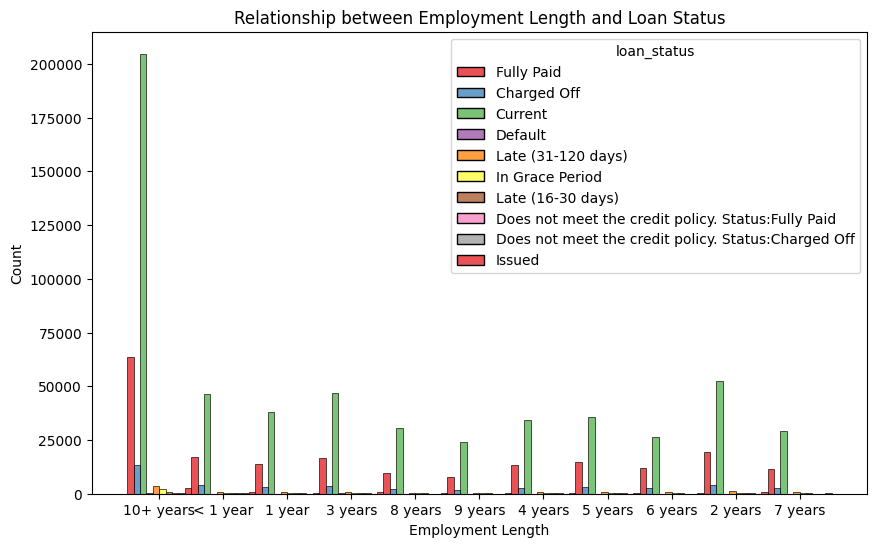

In [25]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create the histogram using Seaborn
sns.histplot(data=df, x="emp_length", hue="loan_status", multiple="dodge", palette='Set1')

# Add title and axis labels
plt.title("Relationship between Employment Length and Loan Status")
plt.xlabel("Employment Length")
plt.ylabel("Count")

# Show the plot
plt.show()

In [26]:
df.drop(columns=['emp_length'], inplace=True)
importante_features = df.columns
len(importante_features)

35

In [30]:
terms = pd.read_excel('LCDataDictionary.xlsx')
terms.columns
feature_description = terms[terms['LoanStatNew'].isin(importante_features)][['LoanStatNew', 'Description']]
feature_description.reset_index(drop=True, inplace=True)

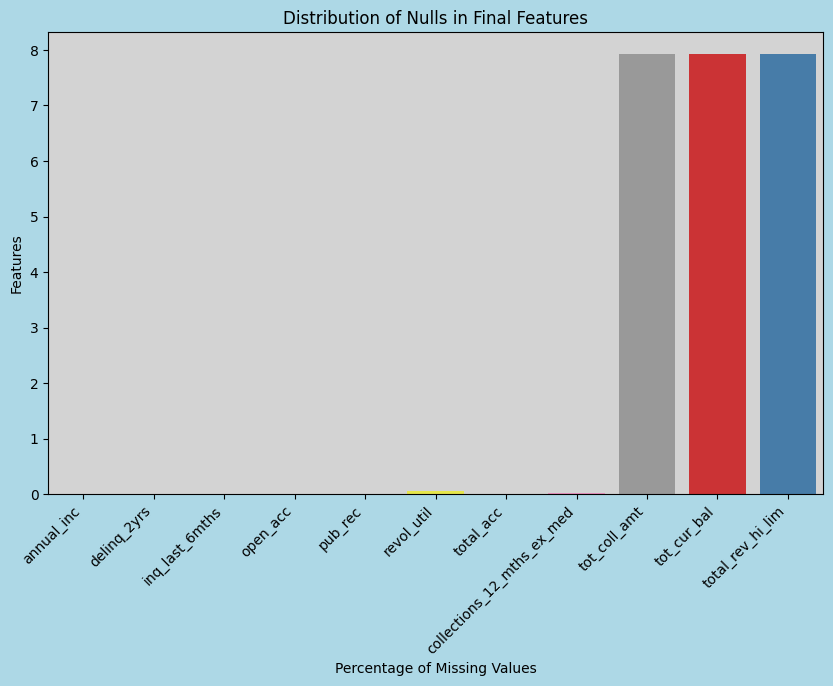

In [31]:
# Get the percentage of missing values for the entire DataFrame
na_percentages = df.isna().mean() * 100

# Filter columns with any missing values
na_percentages = na_percentages[na_percentages > 0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(y=na_percentages.values, x=na_percentages.index, palette='Set1')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Distribution of Nulls in Final Features')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right

# Customize background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot
plt.gcf().set_facecolor('lightblue')  # Figure background color

# Display the plot
plt.show()

In [32]:
df[na_percentages.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 886868 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  886864 non-null  float64
 1   delinq_2yrs                 886839 non-null  float64
 2   inq_last_6mths              886839 non-null  float64
 3   open_acc                    886839 non-null  float64
 4   pub_rec                     886839 non-null  float64
 5   revol_util                  886366 non-null  float64
 6   total_acc                   886839 non-null  float64
 7   collections_12_mths_ex_med  886723 non-null  float64
 8   tot_coll_amt                816592 non-null  float64
 9   tot_cur_bal                 816592 non-null  float64
 10  total_rev_hi_lim            816592 non-null  float64
dtypes: float64(11)
memory usage: 81.2 MB


In [33]:
na_percentages

annual_inc                    0.000451
delinq_2yrs                   0.003270
inq_last_6mths                0.003270
open_acc                      0.003270
pub_rec                       0.003270
revol_util                    0.056604
total_acc                     0.003270
collections_12_mths_ex_med    0.016350
tot_coll_amt                  7.924065
tot_cur_bal                   7.924065
total_rev_hi_lim              7.924065
dtype: float64

In [34]:
print(df.shape)

for i in na_percentages.index:
  if na_percentages[i] < 1:
    df.dropna(subset=[i], inplace=True)

print(df.shape)

(886868, 35)
(886253, 35)


In [35]:
importante_features

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

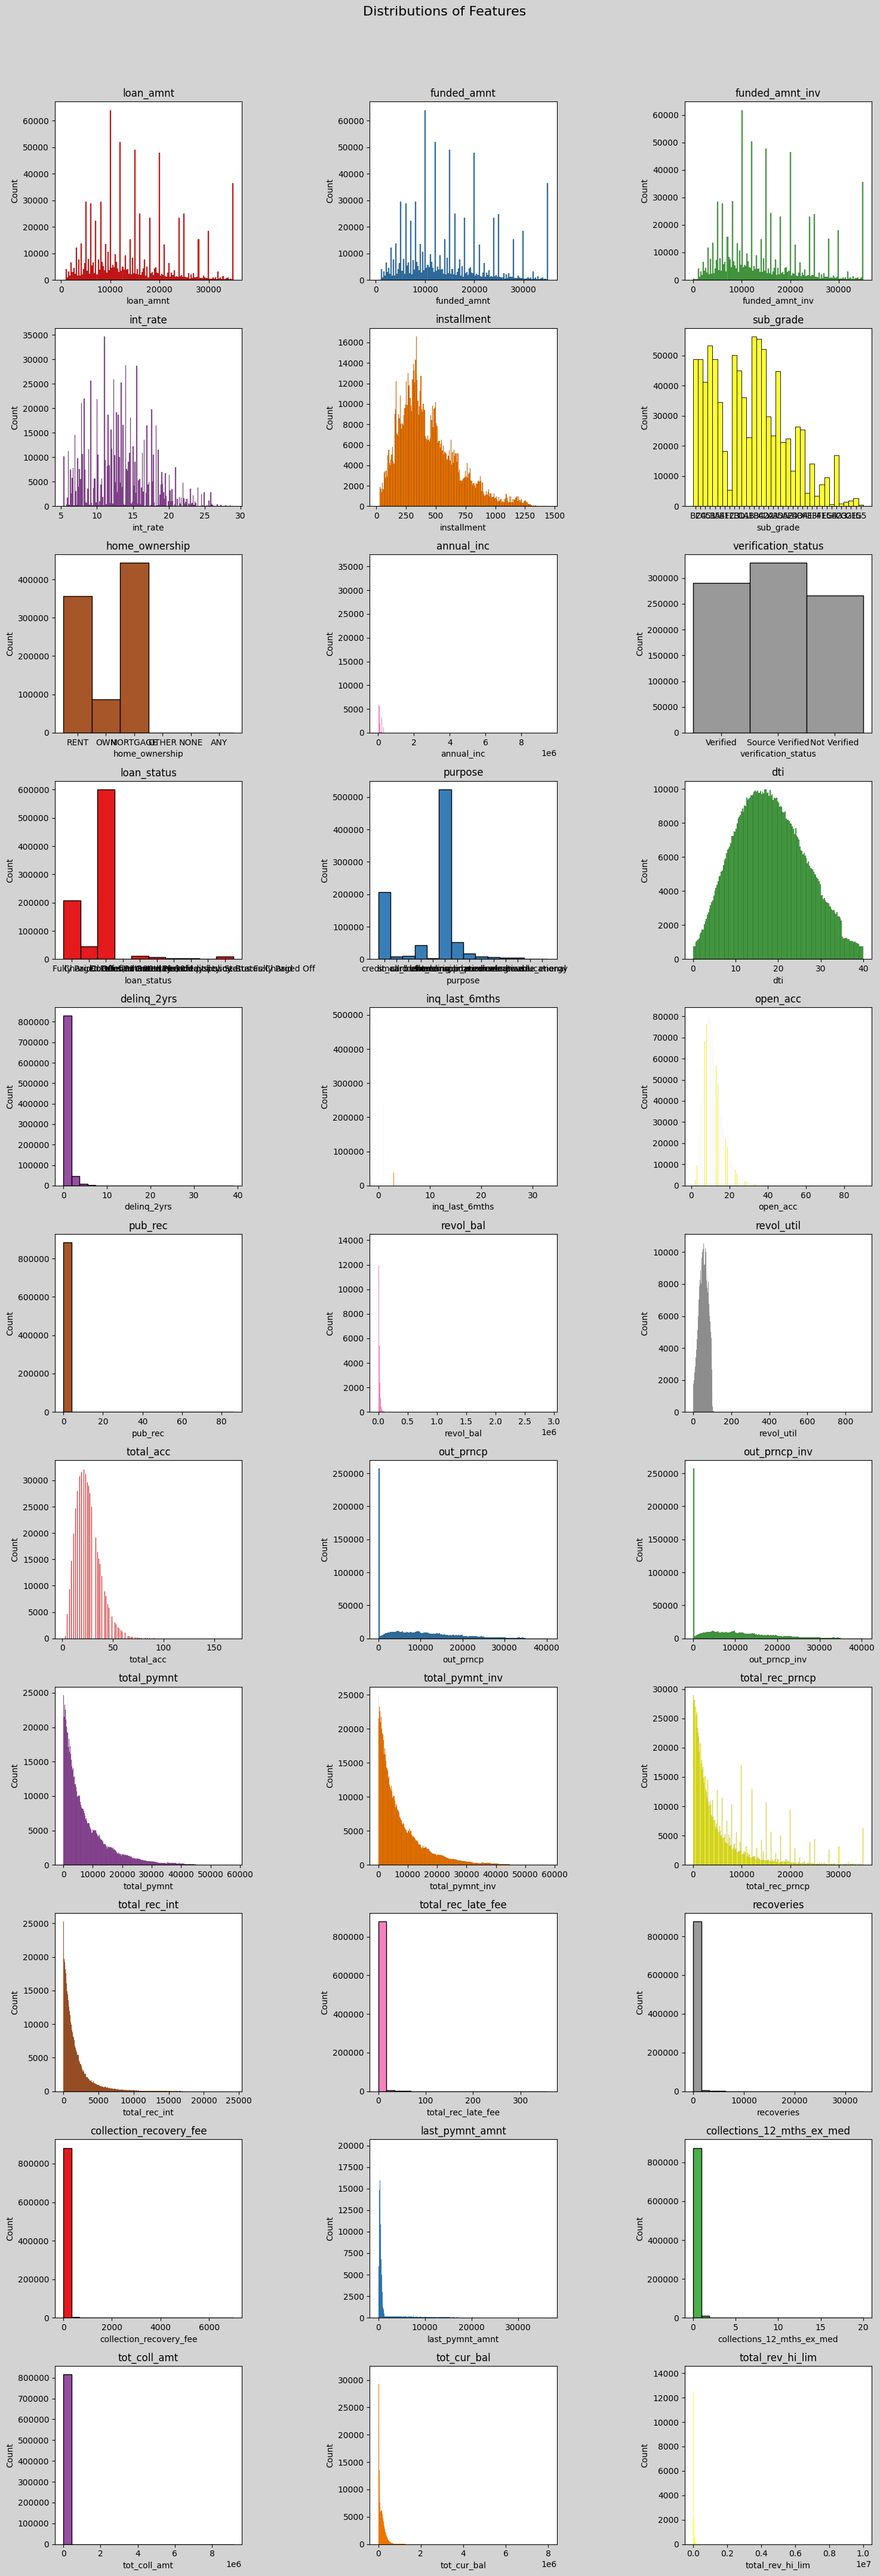

In [36]:
features = [col for col in df.columns if df[col].nunique() > 2]

rows = (len(features) + 2) // 3
cols = 3

# Set up the figure and axis for subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows
fig.patch.set_facecolor('lightgray')  # Set the background color of the entire figure
palette = sns.color_palette('Set1', len(features))
plotted_df = df.copy()
plotted_df['diff_loan_funded'] = plotted_df['loan_amnt'] - plotted_df['funded_amnt']
for i, col in enumerate(features):
    sns.histplot(x=plotted_df[col], kde=False, ax=axes[i], color=palette[i], alpha=1)  # Set alpha slightly transparent for better visualization
    axes[i].set_title(col)

# Remove any empty subplots (in case the number of features doesn't fill the grid)

for j in range(i + 1, len(axes)):

    fig.delaxes(axes[j])


fig.suptitle("Distributions of Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title

plt.show()

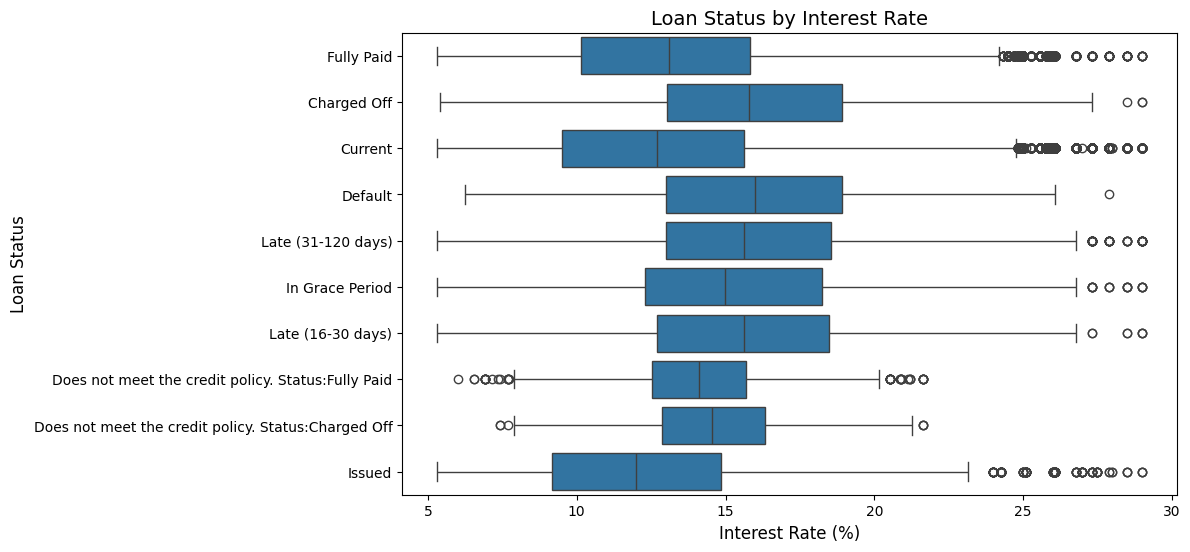

In [37]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='int_rate', y='loan_status', data=df)
plt.title('Loan Status by Interest Rate', fontsize=14)
plt.xlabel('Interest Rate (%)', fontsize=12)
plt.ylabel('Loan Status', fontsize=12)

plt.show()

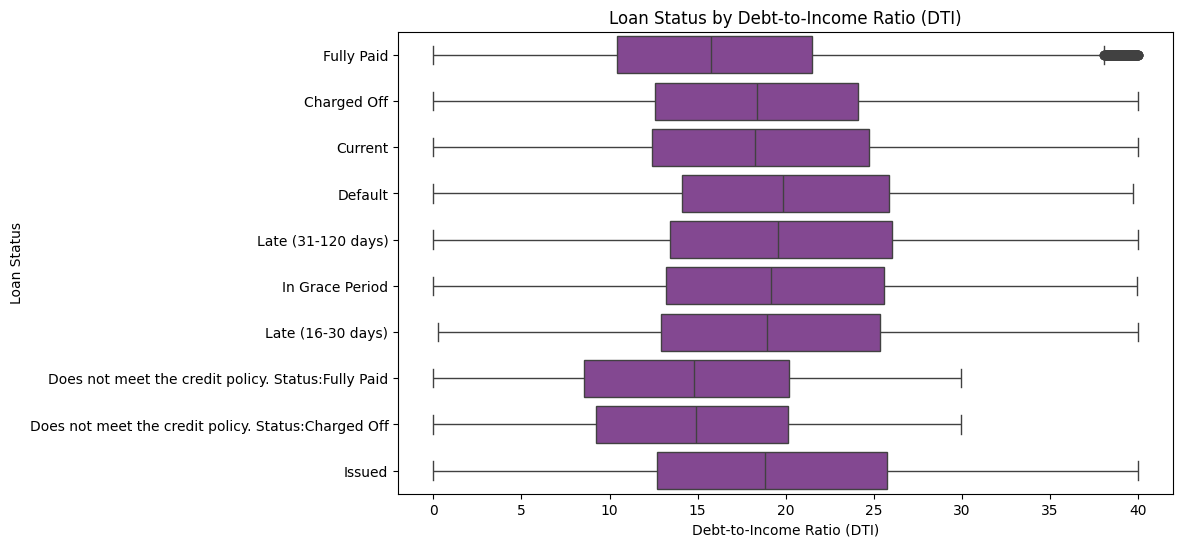

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dti', y='loan_status', data=df, color='#8A3C9D')
plt.title('Loan Status by Debt-to-Income Ratio (DTI)')
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Loan Status')
plt.show()

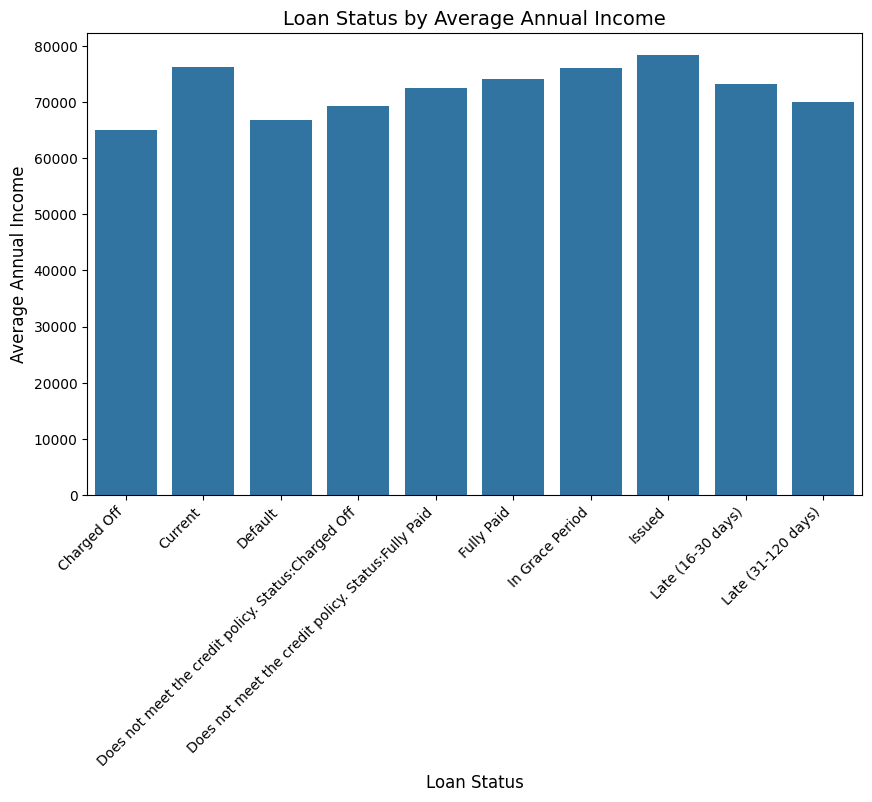

In [39]:
avg_income = df.groupby('loan_status')['annual_inc'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(y='annual_inc',x='loan_status', data=avg_income)

plt.title('Loan Status by Average Annual Income', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Average Annual Income', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

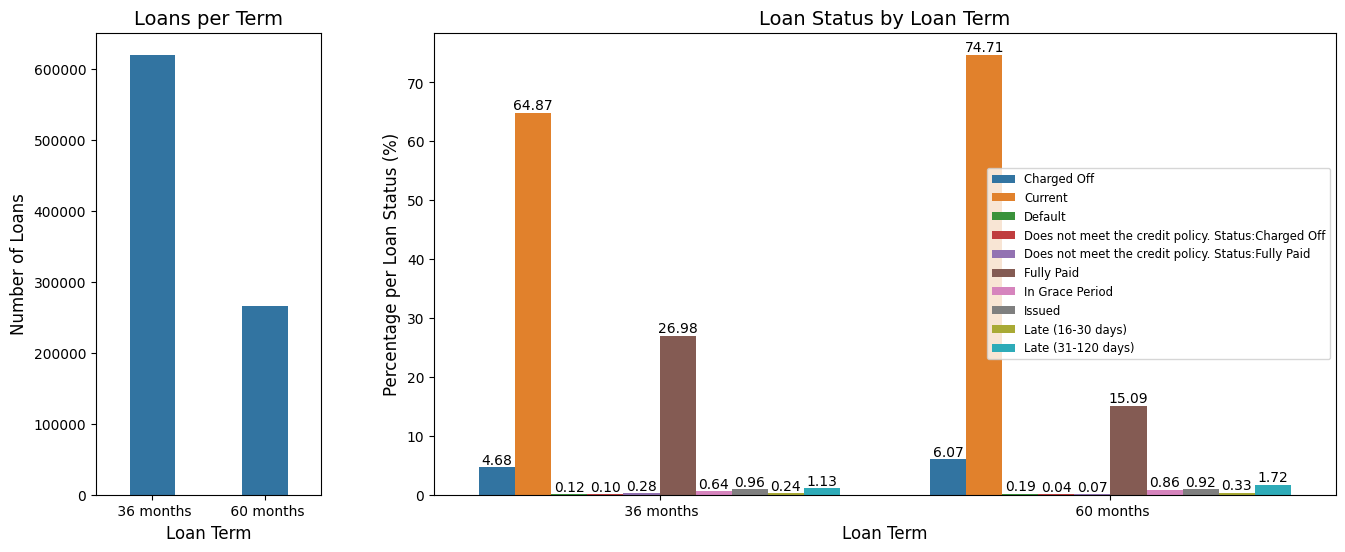

In [40]:
loans_per_term = df['term'].value_counts().reset_index()
count_data = df.groupby(['term', 'loan_status']).size().reset_index(name='count')
count_data['percentage'] = count_data['count'] / count_data.groupby('term')['count'].transform('sum') * 100

fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4])
ax1 = plt.subplot(gs[0])
sns.barplot(x='term', y='count', data=loans_per_term, ax=ax1, width=0.4)
ax1.set_title('Loans per Term', fontsize=14)
ax1.set_xlabel('Loan Term', fontsize=12)
ax1.set_ylabel('Number of Loans', fontsize=12)
ax2 = plt.subplot(gs[1])
sns.barplot(x='term', y='percentage', hue='loan_status', data=count_data, ax=ax2, width=0.8)

for p in ax2.patches:

    height = p.get_height()

    if height > 0:

        ax2.text(

            p.get_x() + p.get_width() / 2.,

            height,

            f'{height:.2f}',

            ha='center',

            va='bottom'

        )

ax2.set_title('Loan Status by Loan Term', fontsize=14)
ax2.set_xlabel('Loan Term', fontsize=12)
ax2.set_ylabel('Percentage per Loan Status (%)', fontsize=12)
ax2.legend( fontsize='small')

plt.show()

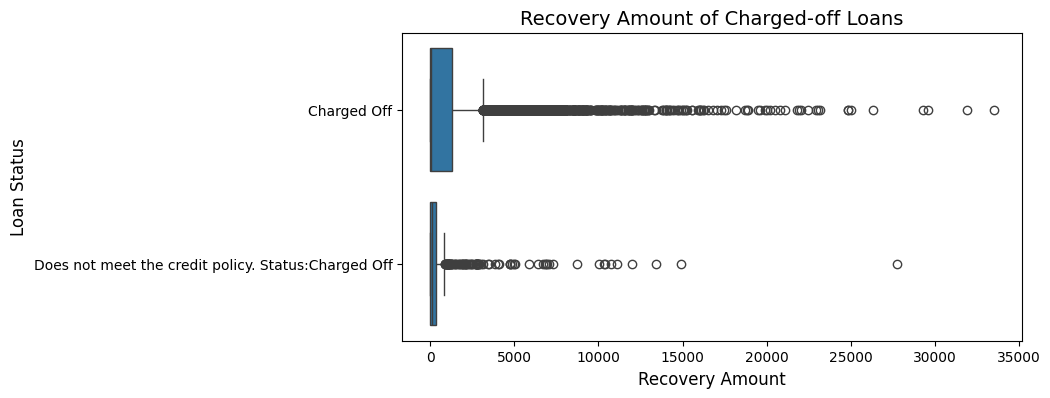

In [43]:
charges_off_df = df[df['loan_status'].str.contains('Charged Off')]
plt.figure(figsize=(8, 4))

sns.boxplot(x='recoveries', y='loan_status', data=charges_off_df)
plt.title('Recovery Amount of Charged-off Loans', fontsize=14)
plt.ylabel('Loan Status', fontsize=12)
plt.xlabel('Recovery Amount', fontsize=12)
plt.show()

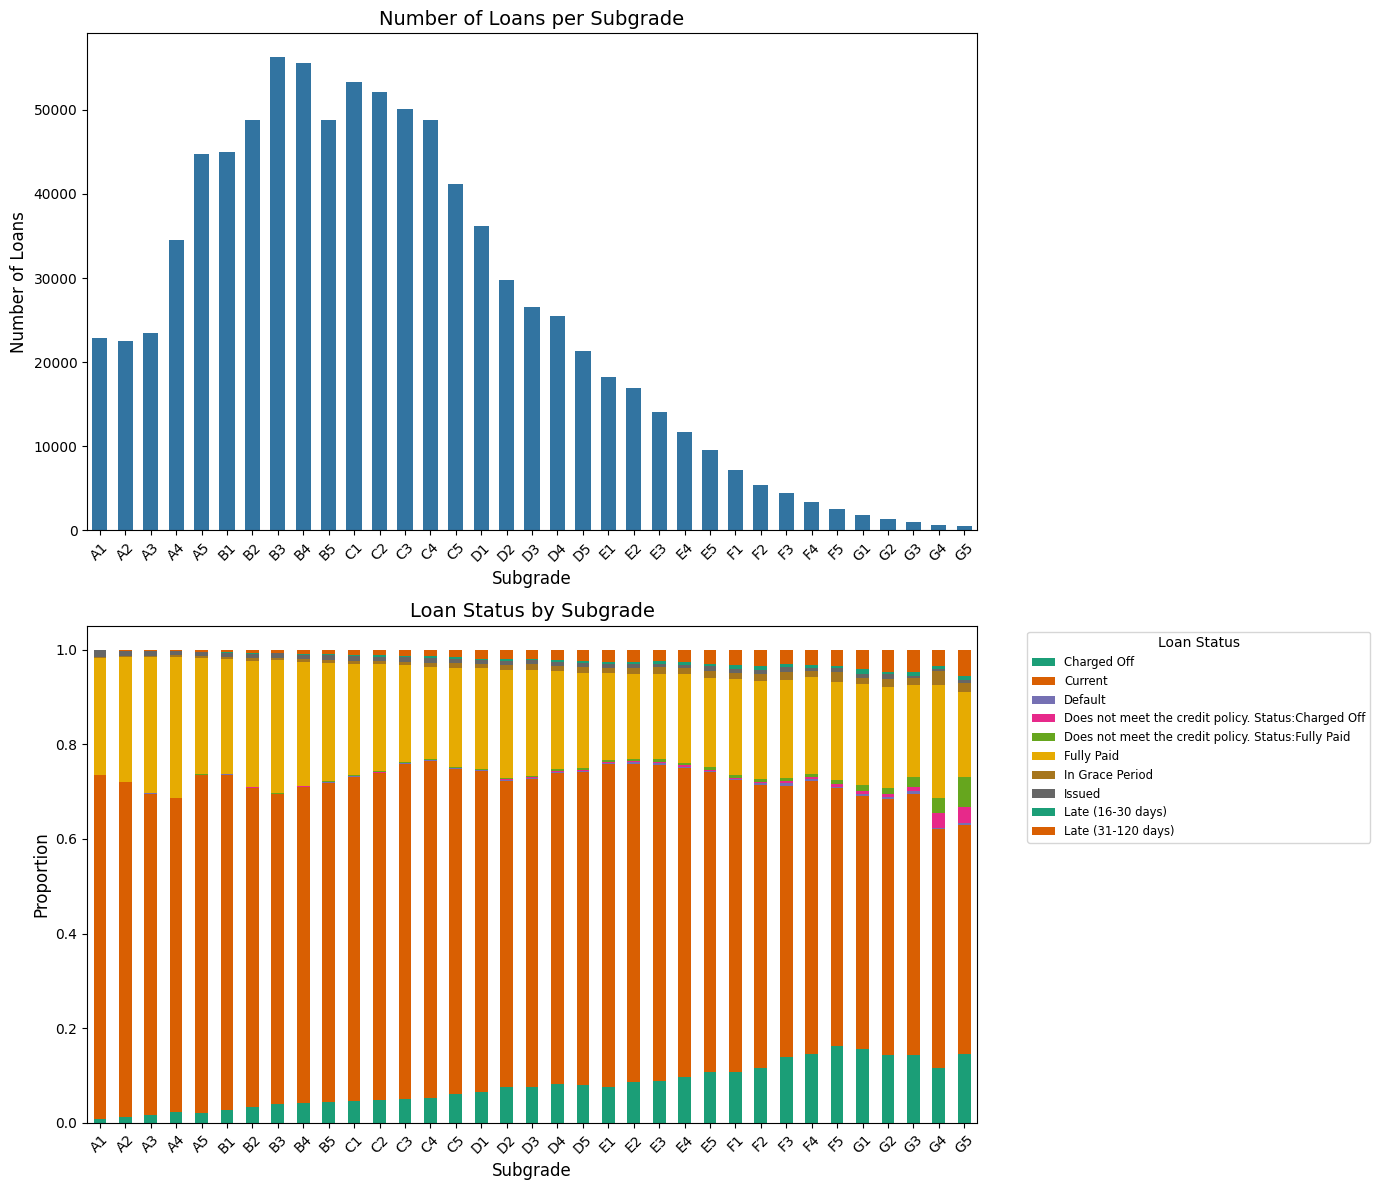

In [44]:
subgrade_counts = df['sub_grade'].value_counts().sort_index()
subgrade_proportions = df.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)
subgrade_proportions = subgrade_proportions.div(subgrade_proportions.sum(axis=1), axis=0)
fig, axes = plt.subplots(2, 1, figsize=(14, 12))
ax1, ax2 = axes[0], axes[1]

sns.barplot(x=subgrade_counts.index, y=subgrade_counts.values, ax=ax1, width=0.6)
ax1.set_title('Number of Loans per Subgrade', fontsize=14)
ax1.set_xlabel('Subgrade', fontsize=12)
ax1.set_ylabel('Number of Loans', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

subgrade_proportions.plot(kind='bar', stacked=True, ax=ax2, color=sns.color_palette('Dark2'))
ax2.set_title('Loan Status by Subgrade', fontsize=14)
ax2.set_xlabel('Subgrade', fontsize=12)
ax2.set_ylabel('Proportion', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

<Figure size 800x1000 with 0 Axes>

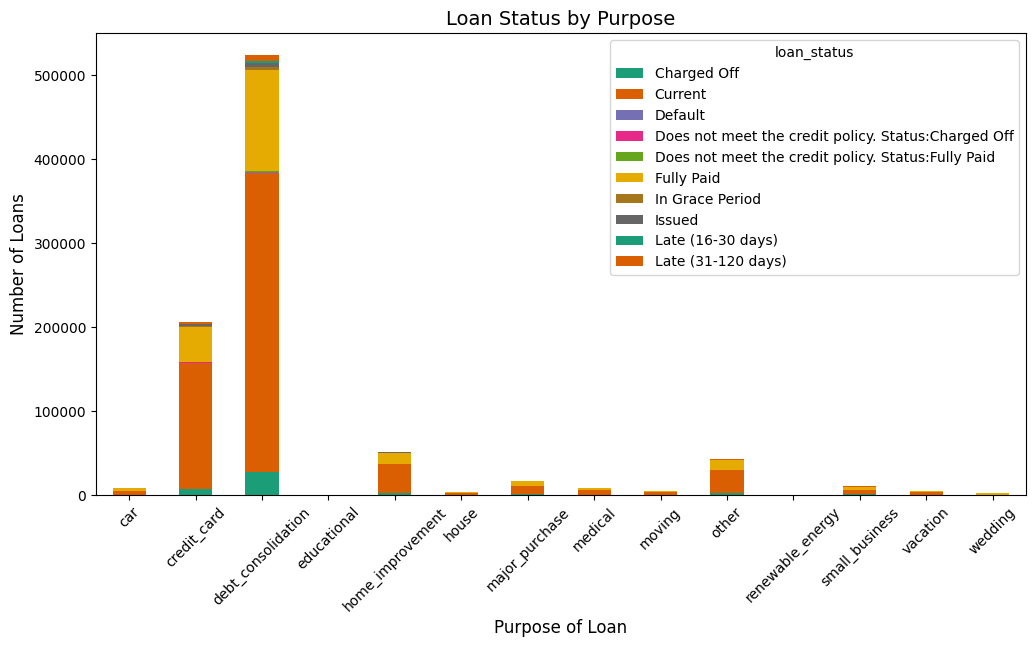

In [45]:
purpose_status_counts = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 10))
purpose_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('Dark2'))

plt.title('Loan Status by Purpose', fontsize=14)
plt.xlabel('Purpose of Loan', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.xticks(rotation=45)
plt.show()